In [61]:
#Impelemented Linear Regression Algorithm
#This is algorithm is Used for prediction of continuous real target values from the given features.
#Data-set used  in this program is from Kaggle - https://www.kaggle.com/andonians/random-linear-regression/data

#Pandas library to read csv file.
import pandas as pd
path = r'E:\Study n Work\Machine Learning\Linear Regression\Data\train.csv'
train_data = pd.read_csv(path)

#x = features - for this dataset only single feature.
#y = target value i.e value to be predicted given x. 
print('Shape = {0}'.format(train_data.shape))
print('\nDataset : ')
train_data[1:10]

Shape = (700, 2)

Dataset : 


,x,y
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [63]:
#Separating train_data into train_dataset(features) and train_labels(target)
import numpy as np
train_dataset = np.array(train_data['x']).reshape(-1,1)
train_labels = np.array(train_data['y']).reshape(-1,1)

#checking for nan values in the data, found only one index=213 so deleted it.
nanLabels = np.where(np.isnan(train_labels))
train_dataset = np.delete(train_dataset,213,0)
train_labels = np.delete(train_labels,213,0)

#shape of train_dataset and tain_labels
print('Train_dataset shape - {0}'.format(train_dataset.shape))
print('Train_labels shape  - {0}'.format(train_labels.shape))

Train_dataset shape - (699, 1)
Train_labels shape  - (699, 1)


In [64]:
#Performing mean normalization and feature scaling.
#This is done so that algorithm converges faster = which means less computation time.

print('Before Normalization :')
print(train_dataset[0:10])

#std = standard deviation
mean = train_dataset[:,0].mean()
std = np.std(train_dataset[:,0])
train_dataset[:,0] = (train_dataset[:,0]-mean)/std

print('\nAfter Normalization :')
print(train_dataset[1:10])

Before Normalization :
[[ 24.]
 [ 50.]
 [ 15.]
 [ 38.]
 [ 87.]
 [ 36.]
 [ 12.]
 [ 81.]
 [ 25.]
 [  5.]]

After Normalization :
[[ -4.94443564e-04]
 [ -1.21015062e+00]
 [ -4.15233705e-01]
 [  1.27828495e+00]
 [ -4.84356915e-01]
 [ -1.31383544e+00]
 [  1.07091531e+00]
 [ -8.64534571e-01]
 [ -1.55576667e+00]]


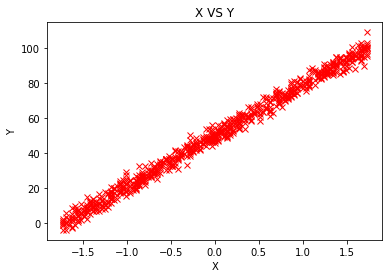

In [65]:
#Lets see how our data looks by plotting.
#using matplotlib for plotting.
import matplotlib.pyplot as plt
plt.plot(train_dataset,train_labels,'rx')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X VS Y')
plt.show()

In [66]:
#Implementing Linear Regression Algorithm.

#import linear_model library from sklearn.
from sklearn import linear_model

#get LinearRegression Algorithm.
#Linear regression parameters - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

lin_reg = linear_model.LinearRegression()

#fit the training data.
lin_reg.fit(train_dataset,train_labels)

#predictions 
train_predictions = lin_reg.predict(train_dataset)

#Score = Coefficient of Determination = https://en.wikipedia.org/wiki/Coefficient_of_determination
#Score = 1 means good fit, -1 means bad fit.
#Score = 0 means constant model that always predicts the expected value of y, disregarding the input features.
print('Score = %f'%lin_reg.score(train_dataset,train_labels))

Score = 0.990702


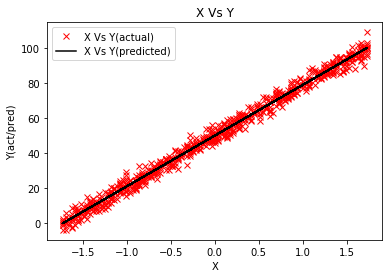

In [76]:
#Lets see our algorithm fits the data.
#red points are features vs actual target values.
#black line corresponds to features vs predicted target values.

plt.figure()
plt.plot(train_dataset,train_labels,'rx',label='X Vs Y(actual)')
plt.plot(train_dataset,train_predictions,'black',label="X Vs Y(predicted)")
plt.xlabel('X')
plt.ylabel('Y(act/pred)')
plt.title('X Vs Y')
plt.legend()
plt.show()

In [77]:
#Get the test dataset 

path = r'E:\Study n Work\Machine Learning\Linear Regression\Data\test.csv'
test_data = pd.read_csv(path)
print("Test Shape : {0}".format(test_data.shape))
print('\nTest Dataset :')
test_data[0:10]

Test Shape : (300, 2)

Test Dataset :


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [78]:
#Separating test_data into test_dataset(features) and test_labels(target)
test_dataset = np.array(test_data['x'],dtype=np.float32).reshape(-1,1)
test_labels = np.array(test_data['y'],dtype= np.float32).reshape(-1,1)
print("Test Dataset shape = {0}".format(test_dataset.shape))
print("Test Labels shape  = {0}".format(test_labels.shape))

Test Dataset shape = (300, 1)
Test Labels shape  = (300, 1)


In [79]:
#Performing Normalization on the Test_dataset
print('Before Normalization :')
print(test_dataset[0:10])

mean = test_dataset[:,0].mean()
std = np.std(test_dataset[:,0])
test_dataset[:,0] = (test_dataset[:,0]-mean)/std

print('\nAfter Normalization :')
print(test_dataset[0:10])

Before Normalization :
[[ 77.]
 [ 21.]
 [ 22.]
 [ 20.]
 [ 36.]
 [ 15.]
 [ 62.]
 [ 95.]
 [ 20.]
 [  5.]]

After Normalization :
[[ 0.91589314]
 [-1.05200624]
 [-1.01686525]
 [-1.08714736]
 [-0.52489036]
 [-1.26285267]
 [ 0.3887772 ]
 [ 1.54843223]
 [-1.08714736]
 [-1.6142633 ]]


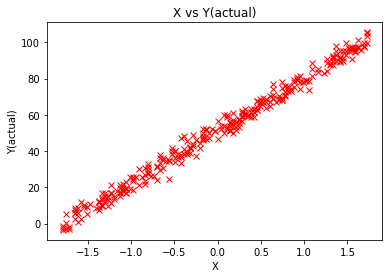

In [80]:
#Plotting the test dataset
plt.plot(test_dataset,test_labels,'rx')
plt.xlabel('X')
plt.ylabel("Y(actual)")
plt.title('X vs Y(actual)')
plt.show()

In [81]:
#making predictions using the trained model
test_predictions = lin_reg.predict(test_dataset)
score = lin_reg.score(test_dataset,test_labels)
print('Test Score = %f'%score)

Test Score = 0.987211


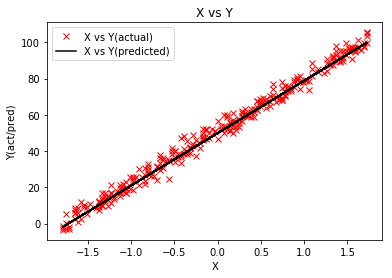

In [83]:
#Plotting the test_dataset vs test-labels
#red crosses are test_dataset vs actual test_labels 
#black line corresponds to test_dataset vs predicted test_labels

plt.figure()
plt.plot(test_dataset,test_labels,'rx',label='X vs Y(actual)')
plt.plot(test_dataset,test_predictions,'black',label='X vs Y(predicted)')
plt.xlabel('X')
plt.ylabel('Y(act/pred)')
plt.title('X vs Y')
plt.legend()
plt.show()